In [2]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing the csv file.

churn_data = pd.read_csv("Churn_Modelling.csv")
churn_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
# Dropping the not required cols.

churn_data.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

In [6]:
# Checking the total null values

churn_data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
churn_data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [8]:
churn_data = pd.get_dummies(churn_data, columns=["Geography", "Gender"], drop_first=True)

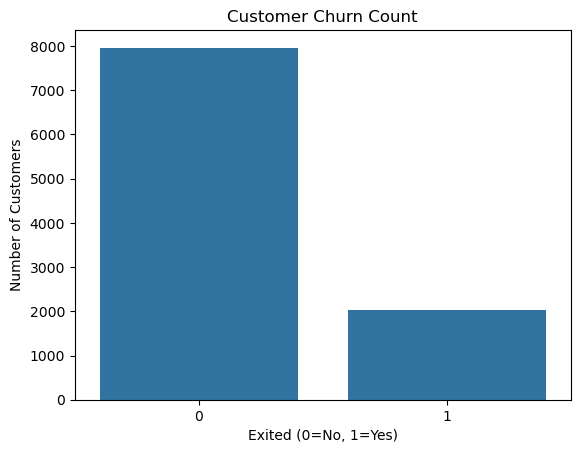

In [10]:
# Visualizing the data.

sns.countplot(x='Exited', data=churn_data)
plt.title("Customer Churn Count")
plt.xlabel('Exited (0=No, 1=Yes)')
plt.ylabel('Number of Customers')
plt.show()

In [13]:
# Importing the libraries for model training.

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [14]:
X = churn_data.drop("Exited", axis=1)
y = churn_data["Exited"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
lr = LogisticRegression()
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

In [16]:
lr.fit(X_train, y_train)

C:\Users\nidhi\OneDrive\Desktop\codsoft\env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [20]:
# Trying out different models

def model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n-----{name}-----")
    print(classification_report(y_test, y_pred))
    print("Accuracy: ", accuracy_score(y_test, y_pred))

In [21]:
lr_accuracy = model(LogisticRegression(), "Logistic Regression")
gb_acuracy = model(GradientBoostingClassifier(), "GradientBoostingClassifier")
rf_accuarcy = model(RandomForestClassifier(), "RandomForestClassifier")

C:\Users\nidhi\OneDrive\Desktop\codsoft\env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



-----Logistic Regression-----
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1576
           1       0.47      0.07      0.13       424

    accuracy                           0.79      2000
   macro avg       0.63      0.53      0.50      2000
weighted avg       0.73      0.79      0.72      2000

Accuracy:  0.786

-----GradientBoostingClassifier-----
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1576
           1       0.78      0.47      0.59       424

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000

Accuracy:  0.859

-----RandomForestClassifier-----
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1576
           1       0.79      0.48      0.60       424

    accuracy                           0.86  

In [26]:
# store_model = [lr, gb, rf]
# model_lists = list(l)

model_names = ["Logistic Regression", "Gradient Boosting", "Random Forest"]

In [27]:
# accuray_model = [lr_accuracy, gb_acuracy, rf_accuarcy]
# accuracy_lists = list(accuray_model)

accuracy_scores = [lr_accuracy, gb_acuracy, rf_accuarcy]